# Chapter 3 - Displaying and Describing Categorical Data

In [2]:
# %load ./snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Frequency Tables

Describe the distribution of a categorical variable.

* Single categorical + counts

In [3]:
# use `value_counts` on a series to get a basic frequency table
# (sort on the index to place the categroies in sorted alpha/numeric order)
d1 = ['c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3',  'c3', 'c3', 'c3',  'c3', 'c3', 'c3']
s1 = Series(d1)
s1.value_counts().sort_index(0)

c1    3
c2    6
c3    9
dtype: int64

* _Relative_ Frequency table substitutes percentages for counts

In [4]:
# add `(normalize=True)` to generate relative frequencies (pcts)
s1.value_counts(normalize=True).sort_index(0)

c1    0.166667
c2    0.333333
c3    0.500000
dtype: float64

### Bar Charts

Good visual representation of a frequency table.

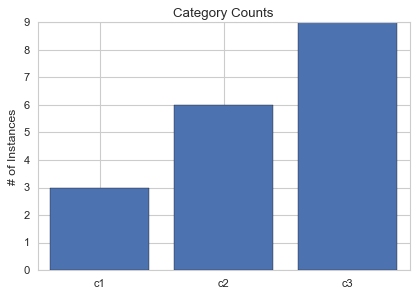

In [5]:
# draw a basic bar chart of counts
freq_table = s1.value_counts().sort_index(0)
objects = freq_table.index.values
y_pos = np.arange(len(objects))
performance = freq_table.values
 
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('# of Instances')
plt.title('Category Counts')
 
plt.show()

* showing relative frequency is often a better means of display in bar chart

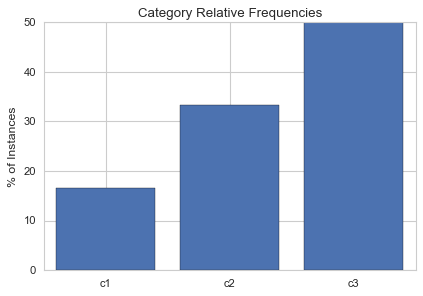

In [6]:
# draw a basic bar chart of frequencies
freq_table = s1.value_counts(normalize=True).sort_index(0)
objects = freq_table.index.values
y_pos = np.arange(len(objects))
performance = freq_table.values * 100
 
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('% of Instances')
plt.title('Category Relative Frequencies')
 
plt.show()

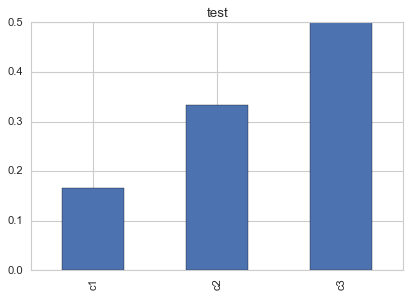

In [7]:
# pandas offers similar plotting, but with less direct control over some of the params
# note: you can grab the returned plot object and set various properties on it
freq_table.plot.bar(title='test');

### Pie Charts

Can also be used to visualize a frequency table.

* Most interpretable when the distribution of values are near divisions of 1/8, 1/4, and 1/2.

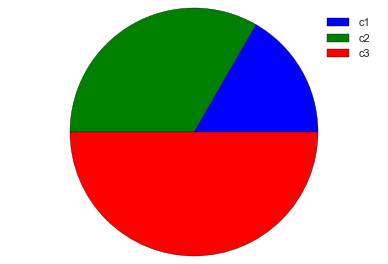

In [8]:
labels = freq_table.index.values
values = freq_table.values
patches, texts = plt.pie(values)
plt.legend(patches, labels)
plt.axis('equal')
plt.show()

### Contingency Tables

Two-way table describing how cases are distributed along two categorical variables.

* Two categorical variables + counts
* Margins of table provide row or column level totals -> marginal distributions
* Percentages: three perspectives - % of row, % of column, % of table

In [9]:
# load the contingencyTable function
%run ./scripts/contingencytable.py

In [19]:
data = [
  { 'y': 'y1', 'x': 'x1' },
  { 'y': 'y2', 'x': 'x2' },
  { 'y': 'y2', 'x': 'x3' },
  { 'y': 'y3', 'x': 'x1' },
  { 'y': 'y3', 'x': 'x2' },
  { 'y': 'y3', 'x': 'x3' },
  { 'y': 'y1', 'x': 'x1' },
  { 'y': 'y2', 'x': 'x2' },
  { 'y': 'y2', 'x': 'x3' },
  { 'y': 'y3', 'x': 'x2' },
  { 'y': 'y3', 'x': 'x2' },
  { 'y': 'y3', 'x': 'x3' },
  { 'y': 'y1', 'x': 'x1' },
  { 'y': 'y2', 'x': 'x2' },
  { 'y': 'y2', 'x': 'x3' },
  { 'y': 'y3', 'x': 'x1' },
  { 'y': 'y1', 'x': 'x3' }            
    ]
df = DataFrame(data=data)
ct = contingencyTable(df, 'y', 'x')
ct

x1        x2        x3        All
y   metric                                              
All count        5.000000  6.000000  6.000000  17.000000
    pctOfColumn  1.000000  1.000000  1.000000   1.000000
    pctOfRow     0.294118  0.352941  0.352941   1.000000
    pctOfTotal   0.294118  0.352941  0.352941   1.000000
y1  count        3.000000  0.000000  1.000000   4.000000
    pctOfColumn  0.600000  0.000000  0.166667   0.235294
    pctOfRow     0.750000  0.000000  0.250000   1.000000
    pctOfTotal   0.176471  0.000000  0.058824   0.235294
y2  count        0.000000  3.000000  3.000000   6.000000
    pctOfColumn  0.000000  0.500000  0.500000   0.352941
    pctOfRow     0.000000  0.500000  0.500000   1.000000
    pctOfTotal   0.000000  0.176471  0.176471   0.352941
y3  count        2.000000  3.000000  2.000000   7.000000
    pctOfColumn  0.400000  0.500000  0.333333   0.411765
    pctOfRow     0.285714  0.428571  0.285714   1.000000
    pctOfTotal   0.117647  0.176471  0.117647   0.411765

### Conditional Distributions

Focus on an individual row or column of a contingency table.  Holding one of the variables to a single value, look at the distribution of cases with respect to the other dimension.

* Single row or column
* If the distribution is same across all values on the other dimension, this is good evidence that the variables are **independent**.

In [20]:
# as an example, let's look at just the y2 values above
ctTemp = ct.drop('All', axis=1)
ctTemp.head()

x1        x2        x3
y   metric                                   
All count        5.000000  6.000000  6.000000
    pctOfColumn  1.000000  1.000000  1.000000
    pctOfRow     0.294118  0.352941  0.352941
    pctOfTotal   0.294118  0.352941  0.352941
y1  count        3.000000  0.000000  1.000000

In [21]:
ct.loc['y2', 'pctOfColumn']

x1     0.000000
x2     0.500000
x3     0.500000
All    0.352941
Name: (y2, pctOfColumn), dtype: float64

### Side-by-Side Bar Charts

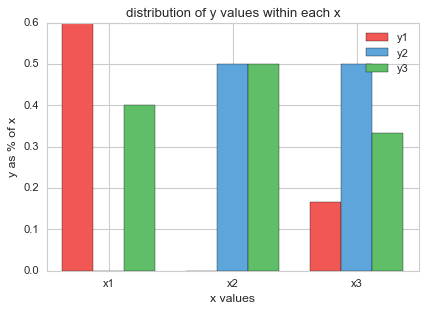

In [22]:
y1 = ctTemp.loc['y1', 'pctOfColumn']
y2 = ctTemp.loc['y2', 'pctOfColumn']
y3 = ctTemp.loc['y3', 'pctOfColumn']

N = len(y1)
ind = np.arange(N)
width = 0.25

red = '#F15854' #(red)
blue = '#5DA5DA' # (blue)
green = '#60BD68' # (green)

# NOTE: the main mechanism for side-by-side bar charts is adjusting the LEFT value by a width offset
p1 = plt.bar(left=ind - width, height=y1, color=red, width=width, align='center')
p2 = plt.bar(left=ind, height=y2, color=blue, width=width, align='center')
p3 = plt.bar(left=ind + width, height=y3, color=green, width=width, align='center')

plt.ylabel('y as % of x')
plt.xlabel('x values')
plt.title('distribution of y values within each x')
plt.xticks(ind, ('x1', 'x2', 'x3', 'All'))
plt.legend((p1[0], p2[0], p3[0]), ('y1', 'y2', 'y3'))
plt.show()

### Segmented Bar Charts

One means of displaying the distributions contained in a contingency table.

* When displayed as percentages, all bars are the same height, showing the relative distribution within each category.

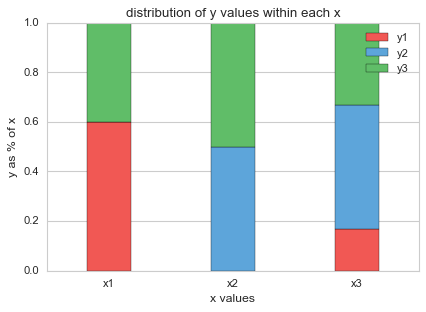

In [23]:
y1 = ctTemp.loc['y1', 'pctOfColumn']
y2 = ctTemp.loc['y2', 'pctOfColumn']
y3 = ctTemp.loc['y3', 'pctOfColumn']

N = len(y1)
ind = np.arange(N)
width = 0.35

red = '#F15854' #(red)
blue = '#5DA5DA' # (blue)
green = '#60BD68' # (green)

# NOTE: the main mechanism for segmented bar charts is adjusting the BOTTOM value by a cumulative height offset
p1 = plt.bar(ind, y1, color=red, width=width, align='center')
p2 = plt.bar(ind, y2, bottom=y1, color=blue, width=width, align='center')
p3 = plt.bar(ind, y3, bottom=y1 + y2, color=green, width=width, align='center')

plt.ylabel('y as % of x')
plt.xlabel('x values')
plt.title('distribution of y values within each x')
plt.xticks(ind, ('x1', 'x2', 'x3', 'All'))
plt.legend((p1[0], p2[0], p3[0]), ('y1', 'y2', 'y3'))
plt.show()

### Step-by-Step Example

**Examining Contingency Tables**

* state what the problem is
* identify variables and related 'W's
* check that variables are non-overlapping categoricals
* review marginal distributions
* compare conditional distributions with appropriate charts
* interpret patterns; discuss possible real-world consequences (without overstating what's seen)

### What Could Go Wrong

* honor the **area principle** when charting -- area occupied on a graph should correspond to the magnitude of the value it represents
* make sure to take overlapping categories into consideration - both numerically and visually
* be clear on the differences in percentages - marginal (row/col) vs. overall
* in addition to evaluating contingency tables, look at variables individually, too; look at the marginal distributions
* be sure to use enough cases
* don't overstate your case

#### Simpson's Paradox
* unfair averaging over different groups: 

### What Have We Learned

[p.34-35]